In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data = pd.read_csv('sales_data.csv')
data.head()

,Date,Product,Region,Quantity Sold,Unit Price,Total Sales,Month
0,2023-01-01,Smartwatch,West,6,64.09,384.54,January
1,2023-01-02,Camera,West,27,379.07,10234.89,January
2,2023-01-03,Keyboard,North,8,459.29,3674.32,January
3,2023-01-04,Headphones,East,2,435.81,871.62,January
4,2023-01-05,Monitor,South,12,484.03,5808.36,January


In [9]:
# Ensure "Date" is in datetime format
data['Date'] = pd.to_datetime(data['Date'])

In [11]:

# Extract month and year for grouping
data['Month'] = data['Date'].dt.month_name()

In [13]:
sales_by_month = data.groupby('Month')['Total Sales'].sum()
best_month = sales_by_month.idxmax()
best_month_sales = sales_by_month.max()
print(f"The best month for sales is {best_month} with total sales of ${best_month_sales:.2f}.")


The best month for sales is January with total sales of $264770.06.


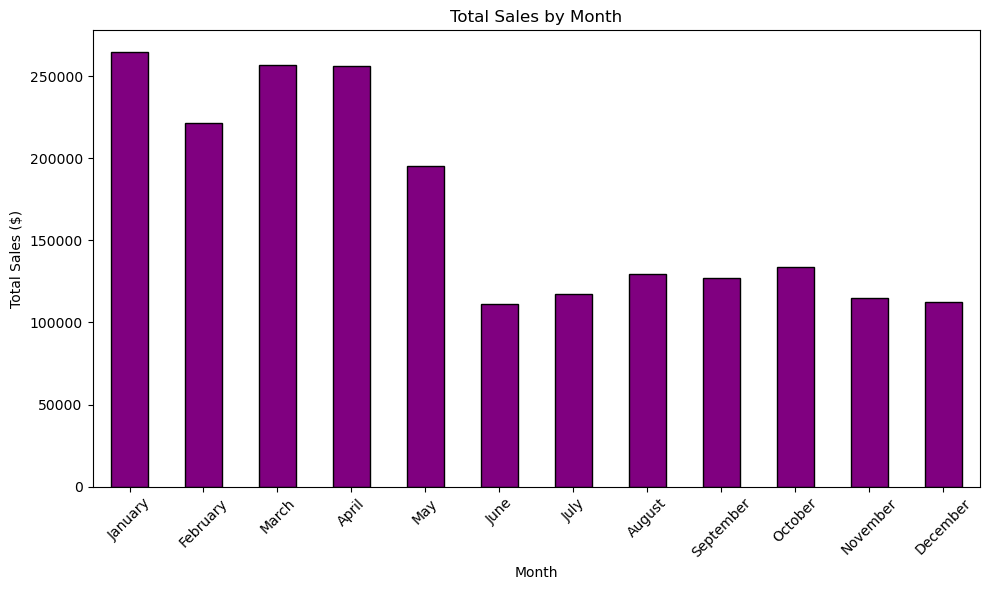

In [17]:
plt.figure(figsize=(10, 6))
sales_by_month = sales_by_month.sort_index(key=lambda x: pd.to_datetime(x, format='%B'))
sales_by_month.plot(kind='bar', color='purple', edgecolor='black')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [19]:
# Sales by Region and Product
region_product_sales = data.groupby(['Region', 'Product'])['Total Sales'].sum().unstack()
print(region_product_sales)

Product    Camera  Headphones  Keyboard    Laptop   Monitor     Mouse  \
Region                                                                  
East     44269.35    46724.80  55554.82  46328.52  44645.10  73708.33   
North    21458.83    32504.22  39291.04  63921.03  38667.18  62482.97   
South    40980.53    78190.12  55193.42  64445.66  62820.80  19867.82   
West     85964.92    51951.32  61721.46  67533.93  86347.30  45955.55   

Product   Printer  Smartphone  Smartwatch    Tablet  
Region                                               
East     44323.46    79321.39    37241.76  18610.54  
North    78757.80    44204.17    43292.34  39570.97  
South    40617.56    44841.31    45105.92   4859.65  
West     34717.46    60875.44    86202.09  48075.85  


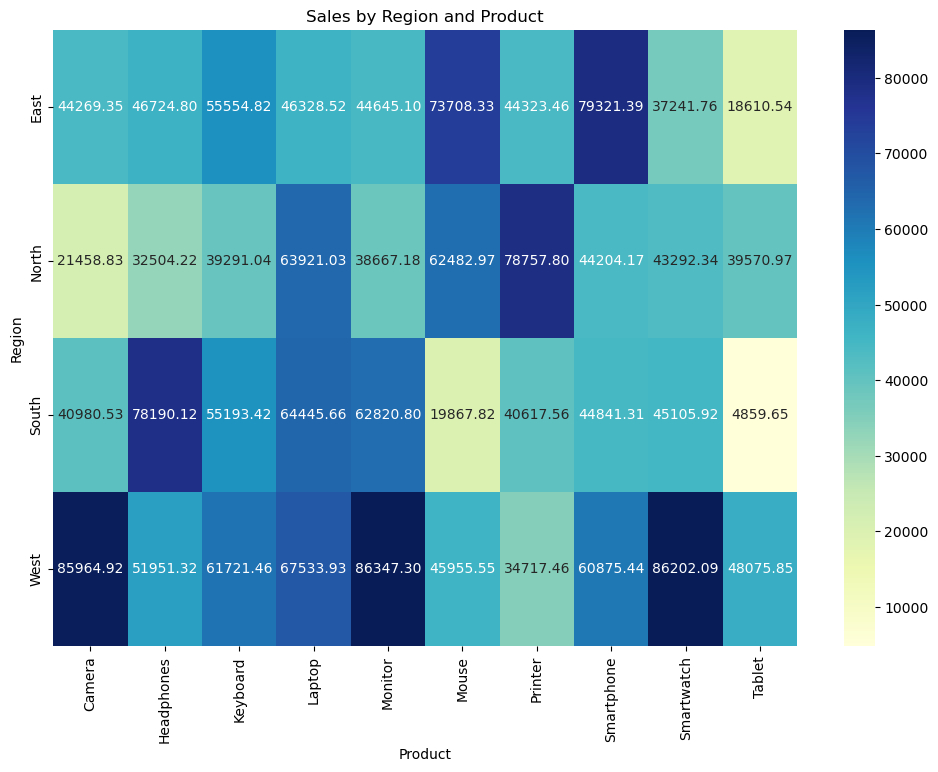

In [21]:
# Heatmap of Sales by Region and Product
plt.figure(figsize=(12, 8))
sns.heatmap(region_product_sales, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True)
plt.title('Sales by Region and Product')
plt.xlabel('Product')
plt.ylabel('Region')
plt.show()

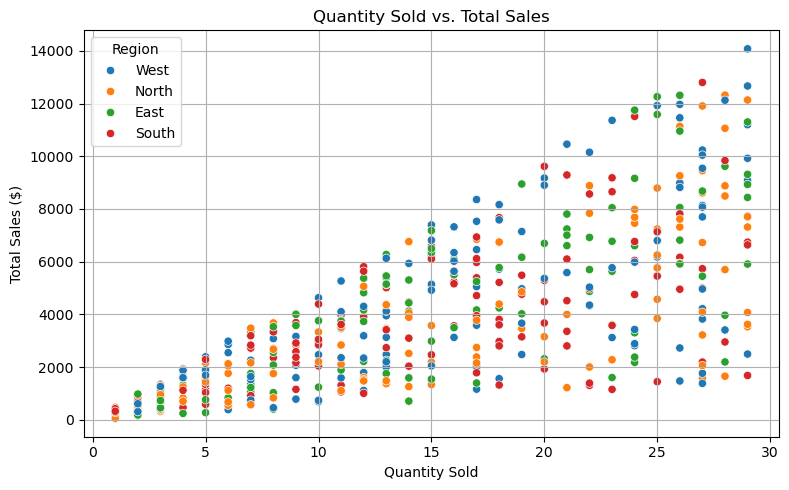

In [23]:
# Correlation Between Quantity and Total Sales
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='Quantity Sold', y='Total Sales', hue='Region', palette='tab10')
plt.title('Quantity Sold vs. Total Sales')
plt.xlabel('Quantity Sold')
plt.ylabel('Total Sales ($)')
plt.legend(title='Region')
plt.grid()
plt.tight_layout()
plt.show()

In [25]:
# 1. Top 5 Products by Total Sales
top_products = data.groupby('Product')['Total Sales'].sum().sort_values(ascending=False).head(5)
print("Top 5 Products by Sales:")
print(top_products)

Top 5 Products by Sales:
Product
Laptop        242229.14
Monitor       232480.38
Smartphone    229242.31
Smartwatch    211842.11
Keyboard      211760.74
Name: Total Sales, dtype: float64


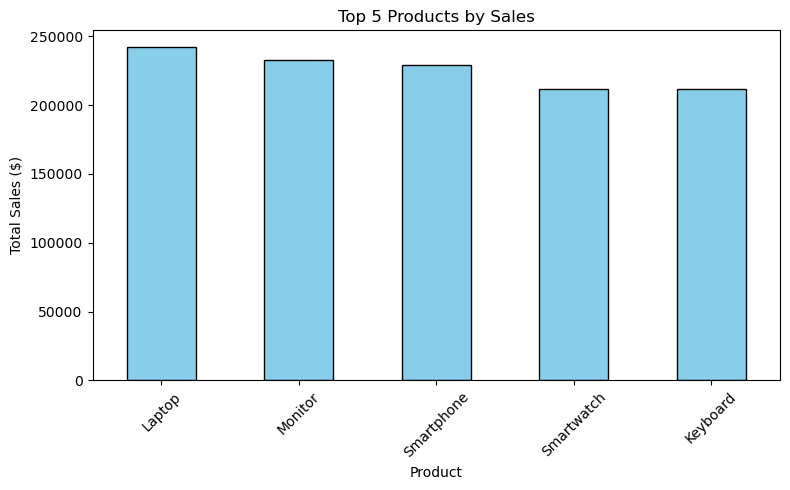

In [27]:
# Plot top products
plt.figure(figsize=(8, 5))
top_products.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 5 Products by Sales')
plt.xlabel('Product')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [31]:
#Region with Highest Sales
sales_by_region = data.groupby('Region')['Total Sales'].sum()
best_region = sales_by_region.idxmax()
print(f"The region with the highest sales is {best_region}.")

The region with the highest sales is West.


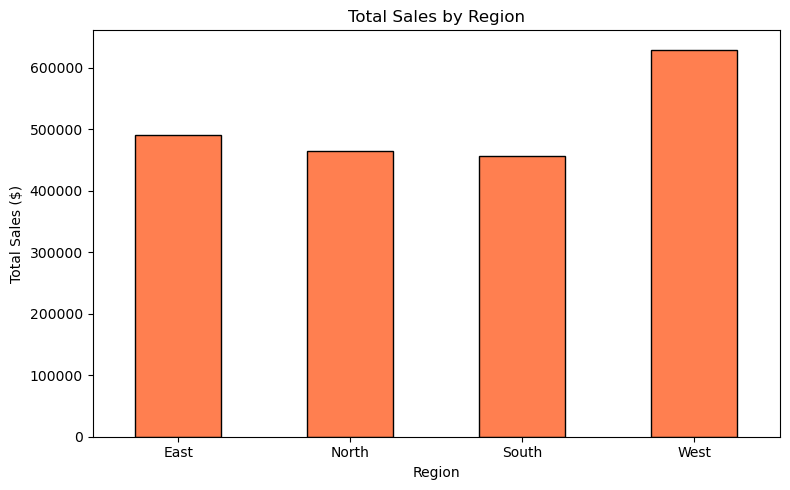

In [33]:
#sales by region
plt.figure(figsize=(8, 5))
sales_by_region.plot(kind='bar', color='coral', edgecolor='black')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [39]:
#Monthly Trends for Top 3 Products
top_3_products = top_products.index[:3]
monthly_trends = data[data['Product'].isin(top_3_products)].groupby(['Month', 'Product'])['Total Sales'].sum().unstack()

<Figure size 1200x600 with 0 Axes>

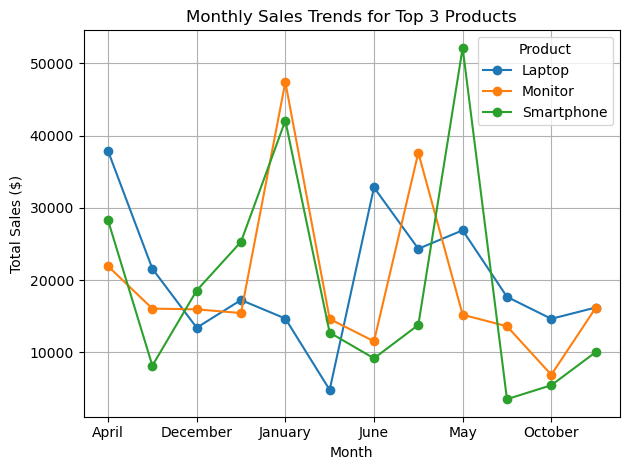

In [43]:
#Plot monthly trends
plt.figure(figsize=(12, 6))
monthly_trends.plot(kind='line', marker='o')
plt.title('Monthly Sales Trends for Top 3 Products')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.legend(title='Product')
plt.grid()
plt.tight_layout()
plt.show()


In [45]:
#Profitability Analysis
profit_margin = 0.3
data['Profit'] = (data['Total Sales'] * profit_margin).round(2)

In [47]:
# Profit by Region
profit_by_region = data.groupby('Region')['Profit'].sum()
print("Profit by Region:")
print(profit_by_region)

Profit by Region:
Region
East     147218.41
North    139245.20
South    137076.86
West     188803.56
Name: Profit, dtype: float64


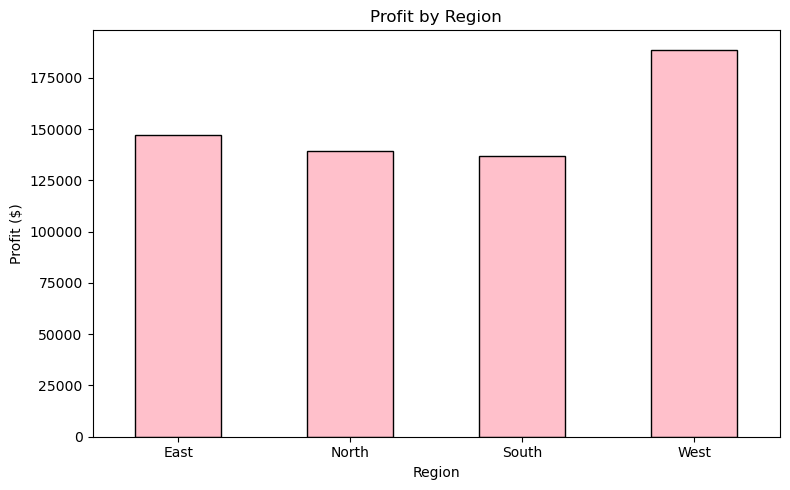

In [51]:
# Plot profit by region
plt.figure(figsize=(8, 5))
profit_by_region.plot(kind='bar', color='pink', edgecolor='black')
plt.title('Profit by Region')
plt.xlabel('Region')
plt.ylabel('Profit ($)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

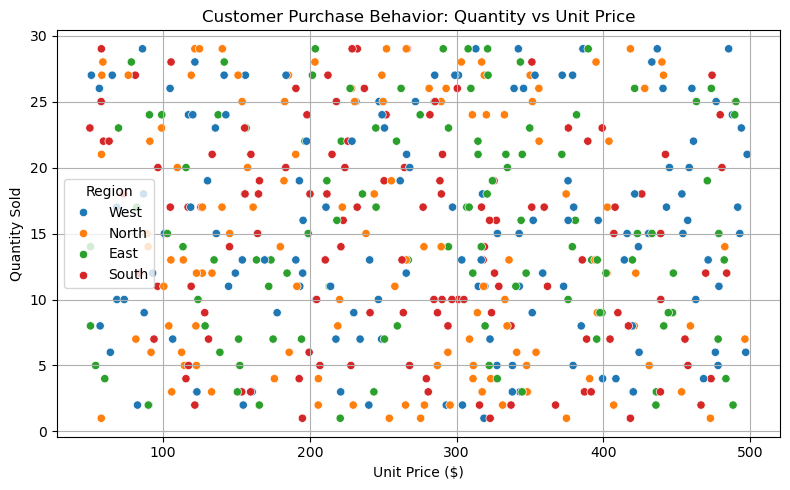

In [53]:
# Customer Purchase Behavior (Quantity vs. Unit Price)
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='Unit Price', y='Quantity Sold', hue='Region', palette='tab10')
plt.title('Customer Purchase Behavior: Quantity vs Unit Price')
plt.xlabel('Unit Price ($)')
plt.ylabel('Quantity Sold')
plt.legend(title='Region')
plt.grid()
plt.tight_layout()
plt.show()